<a href="https://colab.research.google.com/github/Anjalisoni03/data-analysis-projects/blob/main/DA_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install fbprophet

In [7]:
!pip install pystan

In [8]:
import fbprophet
from fbprophet import Prophet

In [9]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [10]:
import pandas as pd
from google.colab import files
data=files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


In [11]:
df=pd.read_csv('covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [12]:
df.shape

(49068, 10)

In [13]:
#performing data pre-processing on data.
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [14]:
#convert date type into datedaytime format
df['Date']=pd.to_datetime(df['Date'])

In [15]:
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [16]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [17]:
df['Date'].nunique()

188

In [18]:
df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,555,17,28,510
2020-01-23,654,18,30,606
2020-01-24,941,26,36,879
2020-01-25,1434,42,39,1353
2020-01-26,2118,56,52,2010
...,...,...,...,...
2020-07-23,15510481,633506,8710969,6166006
2020-07-24,15791645,639650,8939705,6212290
2020-07-25,16047190,644517,9158743,6243930


In [19]:
#to convert above data into dataframe
total=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
total.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


Applying prophet model on data

In [20]:
#rename column name because by default this is the property of prophet library that whatever independent data we have to give to the model we rename as ds and predicted data as y .
df_prophet= total.rename(columns={'Date':'ds','Confirmed':'y'})
df_prophet.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [21]:
#initialising prophet model
m=Prophet()


In [22]:
#to do predection
model=m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Creating future data for prediction purpose

In [23]:
model.seasonalities

OrderedDict([('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0})])

In [24]:
#periods is, for how much days we need dataframe. it will create a dateframe for given days and append the data in df_prophet. D is for daily basis.

future_global=model.make_future_dataframe(periods=30,freq='D')
future_global.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [25]:
future_global.shape

(218, 1)

In [26]:
df_prophet.shape

(188, 5)

In [27]:
prediction=model.predict(future_global)             #predict is function
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.323896e+03,-1.194861e+05,8.770037e+04,-9.323896e+03,-9.323896e+03,-10979.704311,-10979.704311,-10979.704311,-10979.704311,-10979.704311,-10979.704311,0.0,0.0,0.0,-2.030360e+04
1,2020-01-23,-6.626094e+03,-1.124448e+05,1.017826e+05,-6.626094e+03,-6.626094e+03,-1101.212489,-1101.212489,-1101.212489,-1101.212489,-1101.212489,-1101.212489,0.0,0.0,0.0,-7.727307e+03
2,2020-01-24,-3.928293e+03,-1.023538e+05,1.132851e+05,-3.928293e+03,-3.928293e+03,10055.768575,10055.768575,10055.768575,10055.768575,10055.768575,10055.768575,0.0,0.0,0.0,6.127475e+03
3,2020-01-25,-1.230492e+03,-9.695533e+04,1.128058e+05,-1.230492e+03,-1.230492e+03,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,0.0,0.0,0.0,1.249814e+04
4,2020-01-26,1.467309e+03,-9.379192e+04,1.187504e+05,1.467309e+03,1.467309e+03,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,0.0,0.0,0.0,8.746118e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.144165e+07,2.105404e+07,2.181686e+07,2.105972e+07,2.178958e+07,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,0.0,0.0,0.0,2.145538e+07
214,2020-08-23,2.164576e+07,2.124674e+07,2.203150e+07,2.123559e+07,2.201921e+07,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,0.0,0.0,0.0,2.165304e+07
215,2020-08-24,2.184988e+07,2.139657e+07,2.226191e+07,2.141303e+07,2.224648e+07,-2146.590152,-2146.590152,-2146.590152,-2146.590152,-2146.590152,-2146.590152,0.0,0.0,0.0,2.184773e+07
216,2020-08-25,2.205399e+07,2.158621e+07,2.246097e+07,2.158922e+07,2.247272e+07,-16835.705042,-16835.705042,-16835.705042,-16835.705042,-16835.705042,-16835.705042,0.0,0.0,0.0,2.203715e+07


In [28]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145538e+07,2.105404e+07,2.181686e+07
214,2020-08-23,2.165304e+07,2.124674e+07,2.203150e+07
215,2020-08-24,2.184773e+07,2.139657e+07,2.226191e+07
216,2020-08-25,2.203715e+07,2.158621e+07,2.246097e+07
217,2020-08-26,2.224712e+07,2.172682e+07,2.269804e+07


visualize the prediction

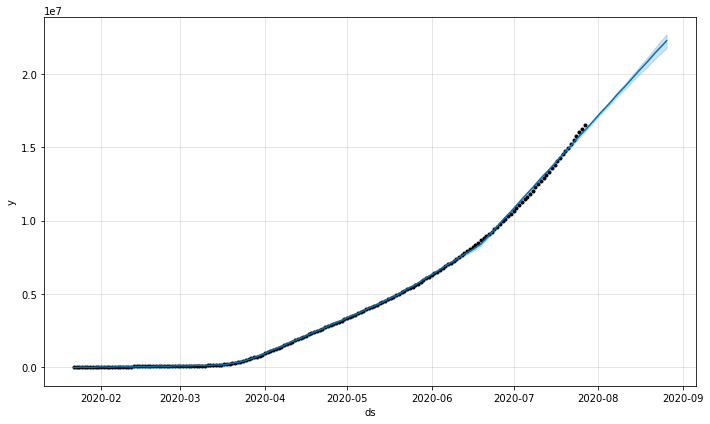

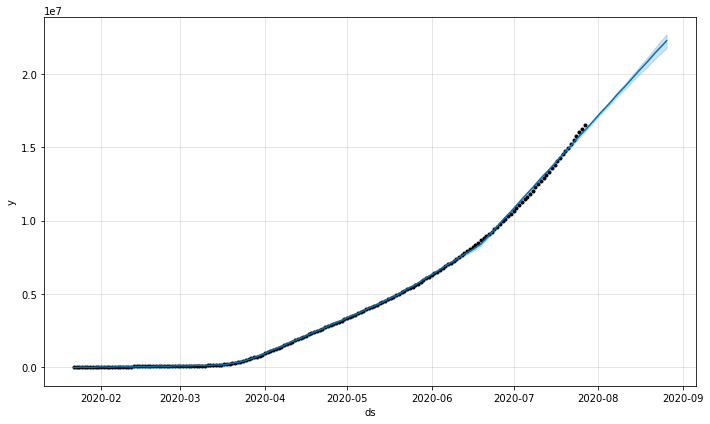

In [29]:
model.plot(prediction)      #

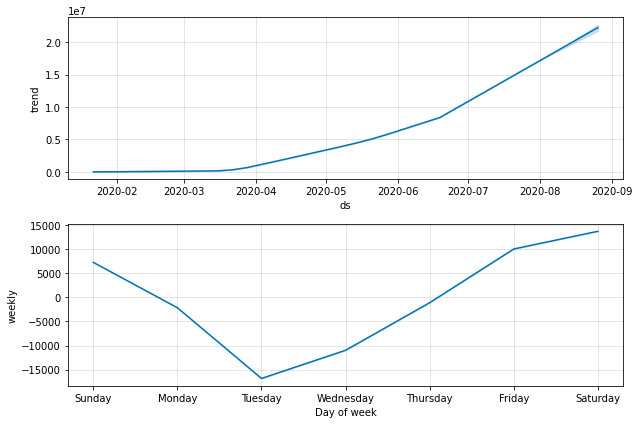

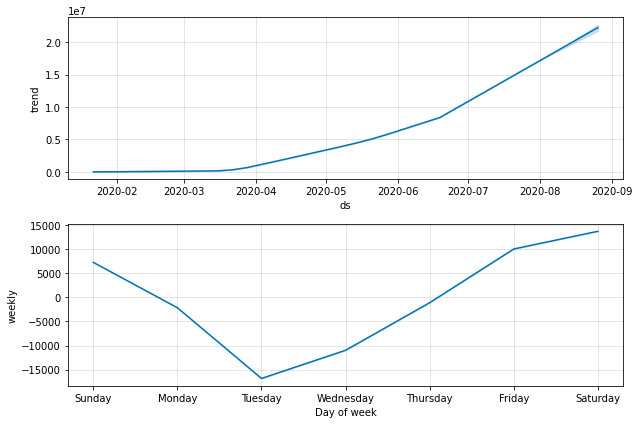

In [30]:
model.plot_components(prediction)  #for weekly predictioon

In [31]:
from fbprophet.plot import add_changepoints_to_plot

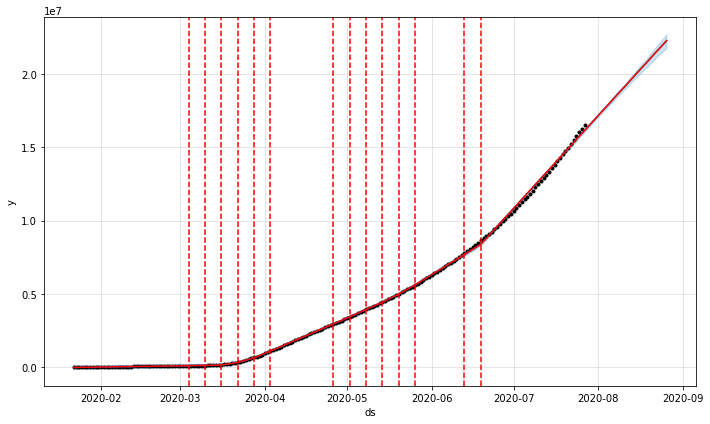

In [32]:
fig=model.plot(prediction)

a=add_changepoints_to_plot(fig.gca(),model,prediction)

fbprophet has its own cross validating module

In [33]:
from fbprophet.diagnostics import cross_validation

In [34]:
df_cv=cross_validation(model,horizon='30 days',period='15 days',initial='90 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

In [35]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.196153e+06,3.206285e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279361e+06,3.291268e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.362935e+06,3.377264e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.441381e+06,3.461875e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.516548e+06,3.545506e+06,3515244,2020-04-28


In [36]:
df_cv.shape

(150, 6)

obtaining performance matric for model
to compute mean absolute error, percent error

In [37]:
from fbprophet.diagnostics import performance_metrics

In [38]:
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.721596e+10,164972.604876,129190.213315,0.016867,0.017675,0.000000
1,4 days,3.770271e+10,194171.855844,151379.846239,0.019330,0.022485,0.000000
2,5 days,5.170151e+10,227379.657369,175214.816680,0.021780,0.025717,0.000000
3,6 days,6.937441e+10,263390.225361,202192.647173,0.024558,0.026714,0.066667
4,7 days,9.012810e+10,300213.430311,232530.254272,0.027838,0.031274,0.133333


In [39]:
from fbprophet.plot import plot_cross_validation_metric

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


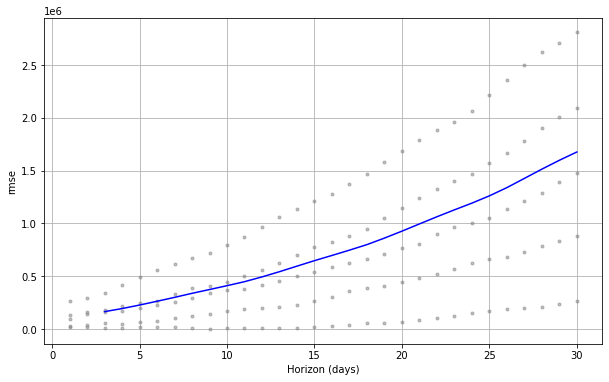

In [41]:
df_performance = plot_cross_validation_metric(df_cv,metric='rmse')

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


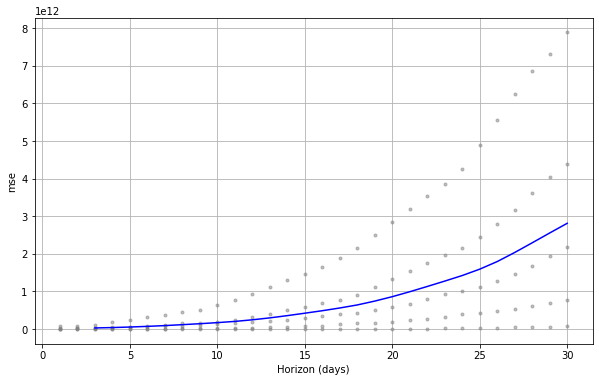

In [42]:
df_performance = plot_cross_validation_metric(df_cv,metric='mse')

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


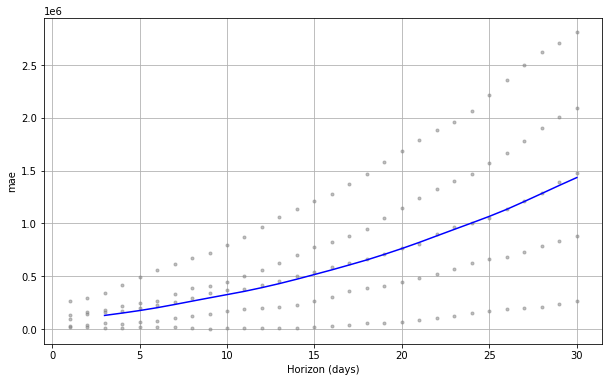

In [43]:
df_performance = plot_cross_validation_metric(df_cv,metric='mae')